MEGA DESAFIO DA THAINÁ: Pegar a amostra completa dos alunos de 13 e 14 anos

Desafio do Gui bonzinho: aumentar a amostra para alunos menor de idade e compara a proporção por estado.

Desafio 3: Criar uma função para plotar o boxplot do seaborn

Desafio 4: Verificar se quem zerou a prova foi eliminado ou não estava presente

Desafio 5: Quem é eliminado tira zero ou será NaN (não teve registro de notas)

Desafio 6: Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro.

Desafio 7: Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto de pandemia.

# Desafio do Gui bonzinho: aumentar a amostra para alunos menor de idade e compara a proporção por estado.

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fonte = 'https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true'

dados = pd.read_csv(fonte)

dados.query('NU_IDADE <= 14')['SG_UF_RESIDENCIA'].value_counts(normalize=True)

provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

dados['NU_NOTA_TOTAL'] = dados[provas].sum(axis=1)

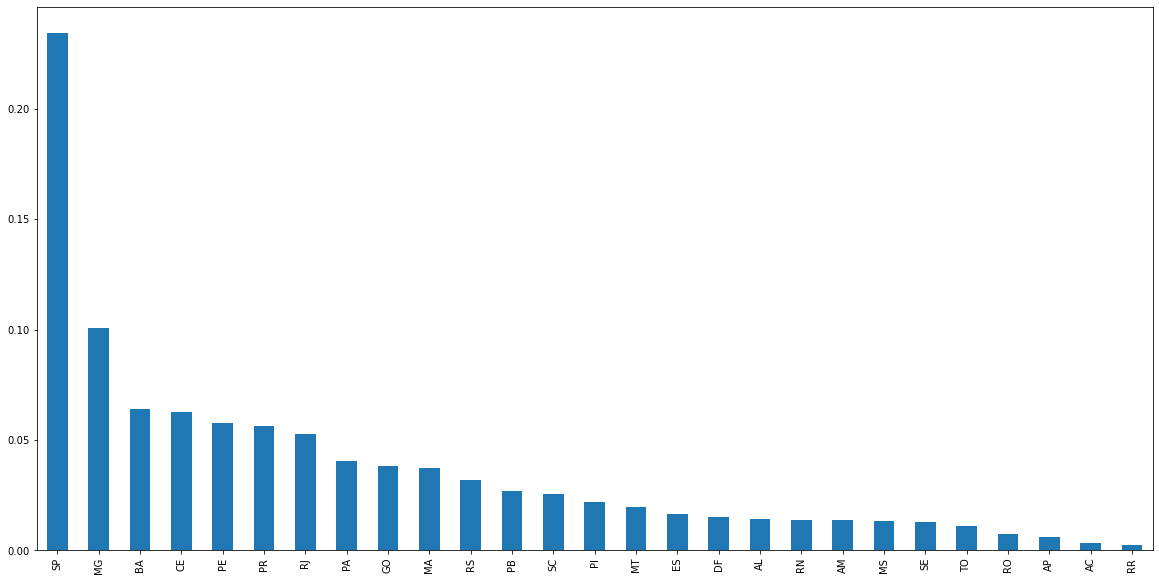

In [ ]:
alunos_menor_de_idade = dados.query('NU_IDADE < 18')
alunos_menor_de_idade['SG_UF_RESIDENCIA'].value_counts(normalize = True).plot.bar(figsize = (20,10))
plt.style.use('fivethirtyeight')

# Desafio 3: Criar uma função para plotar o boxplot do seaborn

Criada a função, ficando fechada na Q006, como base de nossa análise.

Caso seja necessário, podemos modificar a função a fim de trazer maior liberdade.

In [ ]:
def plotar_box_nota(column_name,dados_name):
    renda_ordenada = dados['Q006'].unique()
    renda_ordenada.sort()

    plt.figure(figsize = (20,10))
    sns.boxplot(x='Q006', y = column_name, data = dados_name, order = renda_ordenada)
    plt.title(f'Boxplot com as notas de {column_name} pela renda')

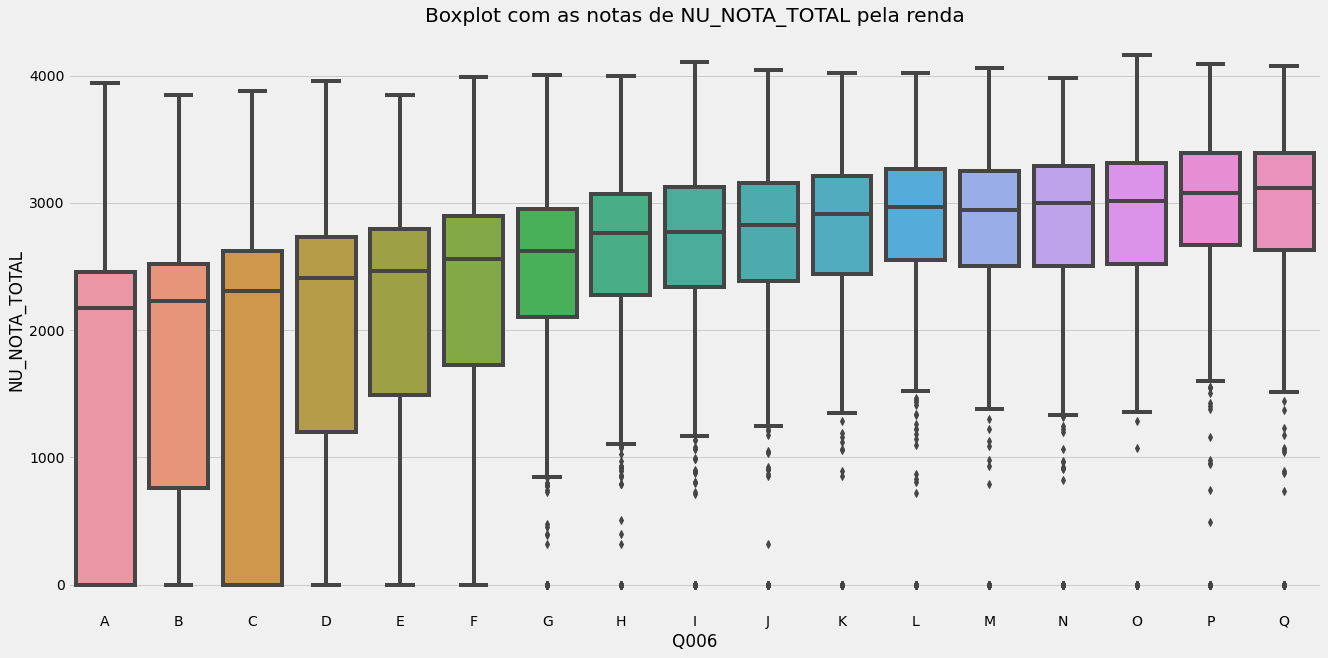

In [ ]:
plotar_box_nota('NU_NOTA_TOTAL',dados)

In [ ]:
dados_sem_nota_zero = dados.query('NU_NOTA_TOTAL != 0')

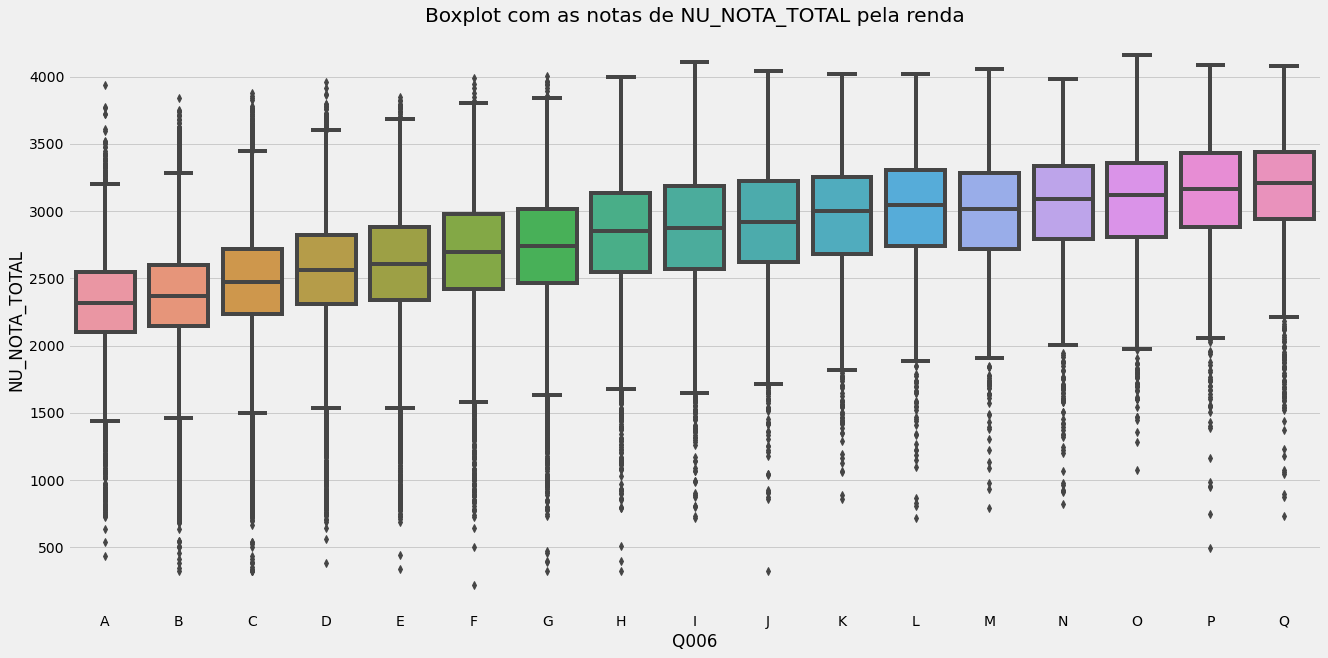

In [ ]:
plotar_box_nota('NU_NOTA_TOTAL',dados_sem_nota_zero)

Como foi necessário mudarmos o box_plot para se tinhamos internet ou não, modifiquei um pouco o código inicial

In [ ]:
def plotar_box(questao,column_name,dados_name,title_escolhido):
    renda_ordenada = dados[questao].unique()
    renda_ordenada.sort()

    plt.figure(figsize = (20,10))
    sns.boxplot(x=questao, y = column_name, data = dados_name, order = renda_ordenada)
    plt.title(title_escolhido)

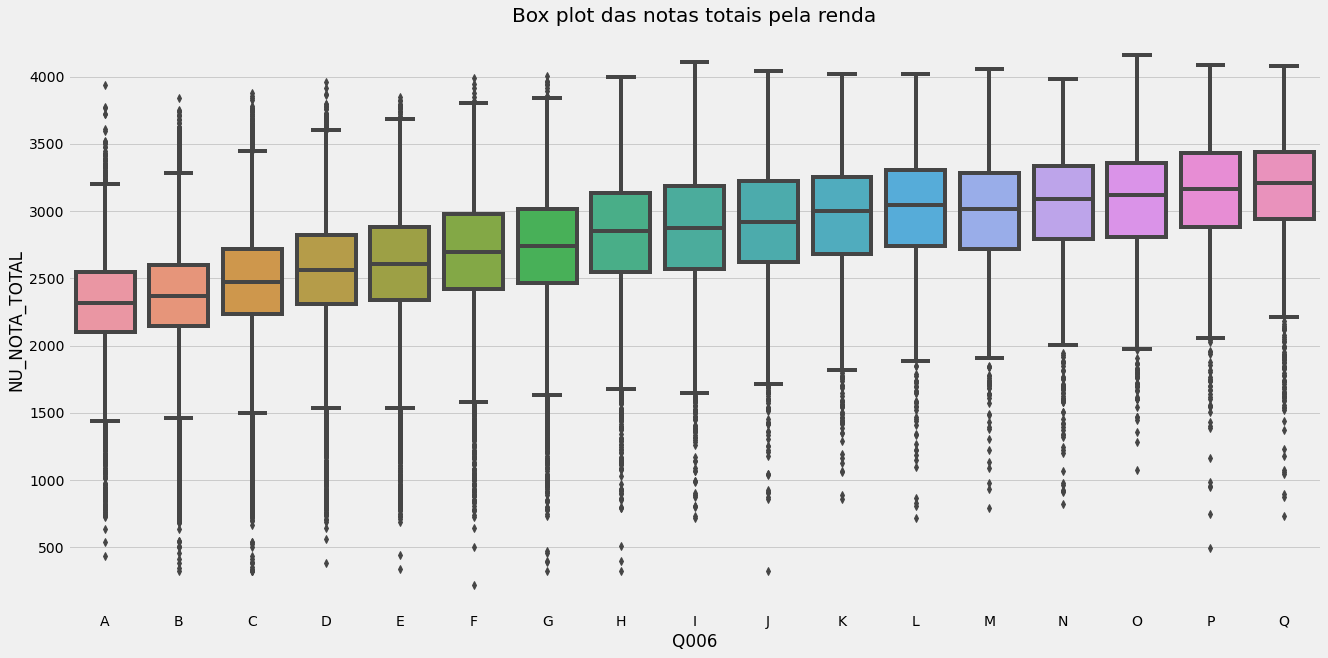

In [ ]:
plotar_box('Q006','NU_NOTA_TOTAL',dados_sem_nota_zero,'Box plot das notas totais pela renda')

# Desafio 4: Verificar se quem zerou a prova foi eliminado ou não estava presente + Desafio 5: Quem é eliminado tira zero ou será NaN (não teve registro de notas)


In [ ]:
dados_nota_zero = dados.query('NU_NOTA_TOTAL == 0')
dados_nota_zero[provas].head(20)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
10,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN
38,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN
43,NaN,NaN,NaN,NaN,NaN
45,NaN,NaN,NaN,NaN,NaN
58,NaN,NaN,NaN,NaN,NaN
74,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,NaN,NaN,NaN


In [ ]:
dados_nota_zero.shape

(29162, 137)

Ainda assim não é possível ter uma idéia... Então crio uma lista com as colunas que definem se estiveram presente ou não.

In [ ]:
presenca = ['TP_PRESENCA_CN','TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT']

In [ ]:
dados_nota_zero_presente = dados_nota_zero.query('TP_PRESENCA_CN == 1 or TP_PRESENCA_CH ==1 or TP_PRESENCA_LC == 1 or TP_PRESENCA_MT== 1')

In [ ]:
dados_nota_zero_presente[provas]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
7741,NaN,0.0,NaN,0.0,0.0
8693,0.0,0.0,0.0,0.0,0.0
19386,NaN,0.0,NaN,0.0,0.0
20881,NaN,0.0,NaN,0.0,0.0
30037,NaN,0.0,NaN,0.0,0.0
33747,NaN,0.0,NaN,0.0,0.0
33897,NaN,0.0,NaN,0.0,0.0
38757,NaN,0.0,NaN,0.0,0.0
42646,NaN,0.0,NaN,0.0,0.0
42749,NaN,0.0,NaN,0.0,0.0


In [ ]:
dados_nota_zero_presente[presenca]

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT
7741,0,1,1,0
8693,1,1,1,1
19386,0,1,1,0
20881,0,1,1,0
30037,0,1,1,0
33747,0,1,1,0
33897,0,1,1,0
38757,0,1,1,0
42646,0,1,1,0
42749,0,1,1,0


In [ ]:
dados_nota_zero_presente.shape

(44, 137)

In [ ]:
dados_nota_zero_presente_todos_dias = dados_nota_zero.query('TP_PRESENCA_CN == 1 and TP_PRESENCA_CH ==1 and TP_PRESENCA_LC == 1 and TP_PRESENCA_MT== 1')
dados_nota_zero_presente_todos_dias[provas]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
8693,0.0,0.0,0.0,0.0,0.0
101269,0.0,0.0,0.0,0.0,0.0


Analisando isto, temos 44 alunos que estiveram presentes em um dos dias e tiveram notas zeradas.
Ao faltar o aluno recebe NaN.

Tivemos apenas 2 alunos que foram ambos os dias e zeram todas as provas.

Assim, 42 alunos foram em apenas um dos dias e tiraram zero.

Percebe-se existe um padrão ao zerar as provas de CH e LC o aluno tende a faltar a prova de MT e CN.

In [ ]:
dados_nota_zero_faltou = dados_nota_zero.query('TP_PRESENCA_CN == 0 or TP_PRESENCA_CH ==0 or TP_PRESENCA_LC == 0 or TP_PRESENCA_MT== 0')

In [ ]:
dados_nota_zero_faltou[provas]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
10,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN
38,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
127351,NaN,NaN,NaN,NaN,NaN
127365,NaN,NaN,NaN,NaN,NaN
127366,NaN,NaN,NaN,NaN,NaN
127368,NaN,NaN,NaN,NaN,NaN


In [ ]:
dados_nota_zero_faltou[presenca]

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT
10,0,0,0,0
11,0,0,0,0
26,0,0,0,0
38,0,0,0,0
40,0,0,0,0
...,...,...,...,...
127351,0,0,0,0
127365,0,0,0,0
127366,0,0,0,0
127368,0,0,0,0


In [ ]:
dados_nota_zero_faltou.shape

(29160, 137)

Quem faltou fica com NaN e são 29160 alunos.

In [ ]:
dados_nota_zero_eliminado = dados_nota_zero.query('TP_PRESENCA_CN == 2 or TP_PRESENCA_CH ==2 or TP_PRESENCA_LC == 2 or TP_PRESENCA_MT== 2')

In [ ]:
dados_nota_zero_eliminado[presenca]

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT
77,0,2,2,0
396,0,2,2,0
446,0,2,2,0
609,0,2,2,0
728,0,2,2,0
...,...,...,...,...
124695,0,2,2,0
125216,0,2,2,0
125784,0,2,2,0
126769,0,2,2,0


In [ ]:
dados_nota_zero_eliminado[provas]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
77,NaN,NaN,NaN,NaN,NaN
396,NaN,NaN,NaN,NaN,NaN
446,NaN,NaN,NaN,NaN,NaN
609,NaN,NaN,NaN,NaN,NaN
728,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
124695,NaN,NaN,NaN,NaN,NaN
125216,NaN,NaN,NaN,NaN,NaN
125784,NaN,NaN,NaN,NaN,NaN
126769,NaN,NaN,NaN,NaN,NaN


Quem foi eliminado fica com nota NaN e foram 120 alunos. Pode ser que ao ser eliminado no primeiro dia, já não contabilize o segundo, já que o candidato irá faltar.

In [ ]:
dados_nota_zero_faltou_todas = dados_nota_zero.query('TP_PRESENCA_CN == 0 and TP_PRESENCA_CH ==0 and TP_PRESENCA_LC == 0 and TP_PRESENCA_MT== 0')
dados_nota_zero_faltou_todas[provas]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
10,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN
38,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
127351,NaN,NaN,NaN,NaN,NaN
127365,NaN,NaN,NaN,NaN,NaN
127366,NaN,NaN,NaN,NaN,NaN
127368,NaN,NaN,NaN,NaN,NaN


Resumindo.:
- Total de alunos com nota zero = 29162
- Foram todos os dias e zeraram = 2
- Faltou todas as provas = 28998
- Foram eliminados = 120
- Faltou alguma prova e fez as outras = 42



- Quem foi eliminado fica com NaN.
- Quem falta fica com NaN.
- Apenas recebe 0 quem foi à prova.


# Desafio 6: Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro.

Para tal iremos analisar a Q006 que nos reflete a renda e o IN_TREINEIRO

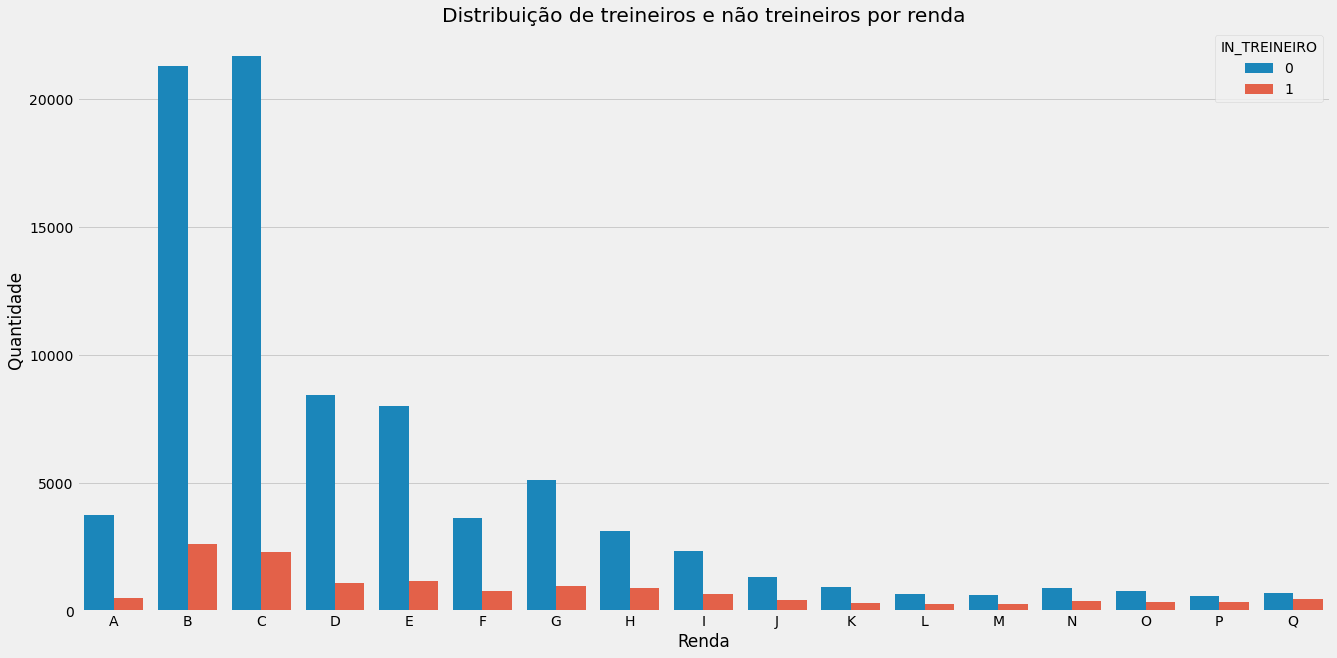

In [ ]:
renda_ordenada = dados['Q006'].unique()
renda_ordenada.sort()

f, ax = plt.subplots(figsize = (20,10))
sns.countplot(x ='Q006', hue ='IN_TREINEIRO', data=dados_sem_nota_zero,  order=renda_ordenada)
plt.title(f'Distribuição de treineiros e não treineiros por renda')
plt.ylabel("Quantidade")
plt.xlabel("Renda")
plt.show()

Podemos ver que a quantidade de não treineiros nas rendas mais baixas é muito expressiva. Ao se aproximar de rendas de classe mais alta, a discrepância entre treineiros e não treineiros diminui muito.

Desafio 7: Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto de pandemia.

In [ ]:
Ao invés de analisarmos a Q006 iremos olhar agora para o Q025

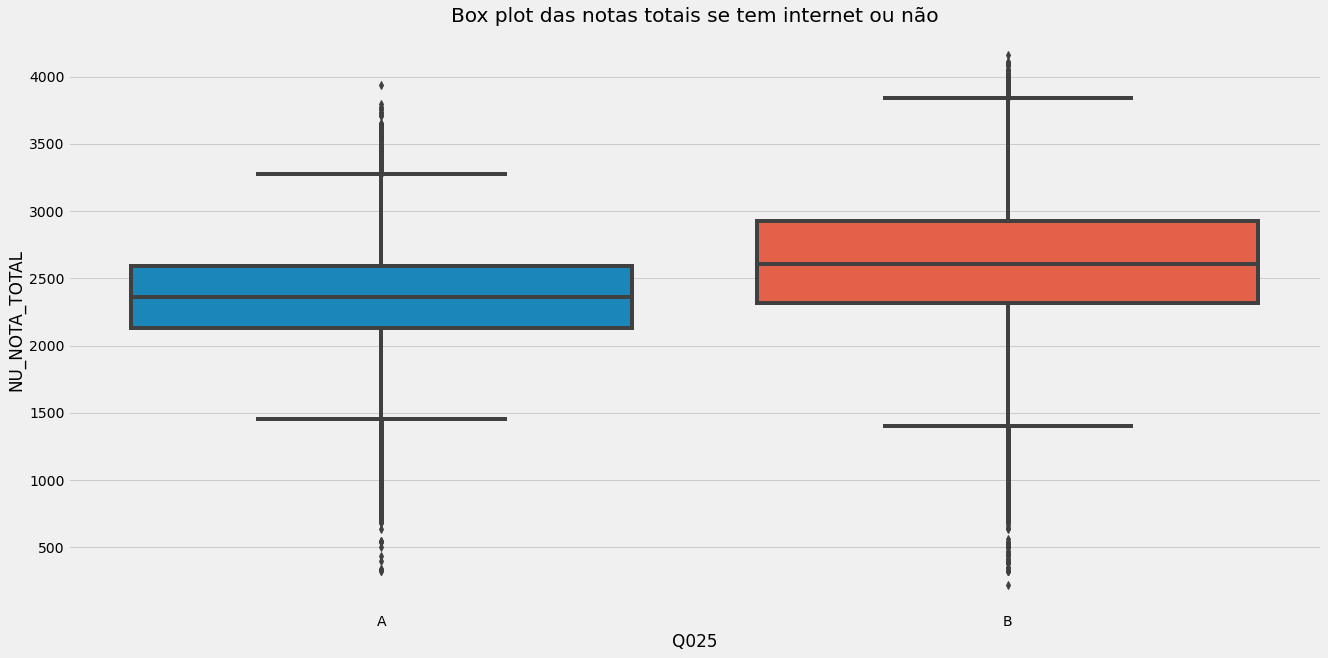

In [ ]:
plotar_box('Q025','NU_NOTA_TOTAL',dados_sem_nota_zero, 'Box plot das notas totais se tem internet ou não')

Desafio não explícito foi: Verificar os alunos que não realizaram provas em suas cidades de moradia.


In [ ]:
dados.query('SG_UF_RESIDENCIA != SG_UF_PROVA')['SG_UF_RESIDENCIA'].value_counts().sort_index()

AC      6
AL     50
AM     12
AP      3
BA    144
CE     45
DF     20
ES     32
GO     81
MA     88
MG    160
MS     23
MT     27
PA     68
PB     75
PE     52
PI     45
PR     45
RJ     38
RN     39
RO     17
RR      3
RS     24
SC     17
SE      8
SP     58
TO     42
Name: SG_UF_RESIDENCIA, dtype: int64

# MEGA DESAFIO DA THAINÁ: Pegar a amostra completa dos alunos de 13 e 14 anos


Travei KKKKK
